# Contexto

Na Estatística nos deparamos com algumas linguagens de programação. A mais comum até agora, pela minha experiência e conhecimento, é a linguagem R. Contudo, no caminho da programação, eu escolhi aprender a linguagem Python e, por estar fazendo um curso de estatística, é claro que eu vou aprender a utilizar a linguagem R. Porém, estou tentado a acreditar que o Python é tão poderoso quanto o R para análises estatísticas. Podemos produzir gráficos mais visuais e utilizar bibliotecas para limpeza de dados,e assim,  produzir uma análise de dados bem completa. É evidente que para um aluno que está indo para o segundo semestre estatística e está indo para seu oitavo em farmácia pode ser e ainda falte alguns conhecimentos, se me comparar com quem é formado e tem experiência na área.  Nesse projeto pretendo utilizar de conceitos estatístico básicos para conseguir fazer uma limpeza de dados eficiente e produzir Heatmaps com esses dados. 
``````````````````````````````````
Mas você me pergunta: “Que dados?”

``````````````````````````````````

Existe um site que se chama Portal Gtex, o qual se trata de um repositório de dados relacionados a expressões genéticas em vários tipos de tecidos. Existem nessas tabelas com formatos diferentes e com  mais de 50 mil registros. O objetivo é correlacionar esses registros uns com os outros. Porém, conheço as limitações das IDEs Python e Notebooks que são bastante utilizados como o Jupyter e o Colab. Por esse motivo uma filtragem e limpeza desses dados se faz muito importante. De fato, o trabalho de um cientista de dados  tem que saber tratar os dados e, isso também, faz parte do trabalho de estatístico. Então, espero apreciem este projeto de tratamento de dados e produção de gráficos Heatmap e que consiga mostrar meu potencial para criar, somar e crescer nessa área. É válido ressaltar que críticas são bem-vindas e convites mais ainda!


``````````````````````````````````
Vamos ao código.

``````````````````````````````````

# Bibliotecas Importadas

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from google.colab import files
src = list(files.upload().values())[0]
open('mylib.py','wb').write(src)
import mylib as gct


Saving gct_to_pandas.py to gct_to_pandas (1).py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Produzindo Tabela no Formato Pandas

Aqui produzo três objetos para extrair os dados da tabela GCT e transformar em uma tabela que possa ser lida pela biblioteca pandas. Essa biblioteca é de produção própria, confesso que foi divertido fazer. Estudar classes é um verdadeiro desafio.

In [ ]:
caminho = r'/content/drive/MyDrive/Colab Notebooks/Projetos no Site Portifólio/gene_tpm_2017-06-05_v8_bladder.gct'
nome = 'gene_tpm_2017-06-05_v8_bladder'
arquivo = gct.Gct(nome, caminho)

In [ ]:
arquivo = arquivo.to_df()

A tabela foi produzida com sucesso. Nenhuma execeção foi chamada, então podemos começar a limpeza dos dados e em seguida a análise estatística. 

In [ ]:
arquivo.head()

,ID,NAME,DESCRIPTION,GTEX-OIZF-1926-SM-7PBZS,GTEX-P44H-2226-SM-E9U4P,GTEX-QEL4-1826-SM-EZ6KU,GTEX-RN64-2426-SM-EZ6L2,GTEX-RU72-2526-SM-EWRML,GTEX-S32W-1126-SM-4AD5V,GTEX-S33H-1926-SM-EYYVH,...,GTEX-SE5C-1026-SM-4BRUG,GTEX-SNMC-0826-SM-4DM66,GTEX-SNOS-0526-SM-4DM54,GTEX-T2YK-2326-SM-EZ6LA,GTEX-T5JW-1026-SM-EZ6LR,GTEX-T6MN-2226-SM-EVYAM,GTEX-TMMY-1526-SM-4DXST,GTEX-U3ZM-0826-SM-4DXU6,GTEX-U3ZN-1226-SM-4DXUD,GTEX-U4B1-1226-SM-4DXT7
0,0,ENSG00000223972.5,DDX11L1,0.0174,0.000,0.0000,0.0000,0.0192,0.000,0.000,...,0.0275,0.000,0.0000,0.0236,0.0157,0.0000,0.000,0.000,0.000,0.0294
1,1,ENSG00000227232.5,WASH7P,3.0830,7.071,2.6030,8.5010,1.0260,3.699,2.418,...,5.9010,7.256,12.5800,7.5540,3.0950,5.9300,5.136,5.515,3.736,4.0230
2,2,ENSG00000278267.1,MIR6859-1,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0000
3,3,ENSG00000243485.5,MIR1302-2HG,0.0348,0.000,0.0344,0.0401,0.0384,0.000,0.000,...,0.0000,0.000,0.0784,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0000
4,4,ENSG00000237613.2,FAM138A,0.0000,0.000,0.0489,0.0285,0.0000,0.000,0.000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0311,0.000,0.000,0.000,0.0000


# Excluindo e tratando colunas na tabela

As colunas ID, NAME e Description tem basicamente o mesmo valor pois seus conteudos são valores únicos que identificam cada gene por isso há necessidade das três permancerem na tabela, por esse motivo preferi escolher a coluna `Description`.

In [ ]:
arquivo.drop(['ID', 'NAME'], axis=1, inplace=True)
arquivo.head(5)

,DESCRIPTION,GTEX-OIZF-1926-SM-7PBZS,GTEX-P44H-2226-SM-E9U4P,GTEX-QEL4-1826-SM-EZ6KU,GTEX-RN64-2426-SM-EZ6L2,GTEX-RU72-2526-SM-EWRML,GTEX-S32W-1126-SM-4AD5V,GTEX-S33H-1926-SM-EYYVH,GTEX-S3XE-1226-SM-4AD4L,GTEX-S4Q7-0926-SM-4AD5D,...,GTEX-SE5C-1026-SM-4BRUG,GTEX-SNMC-0826-SM-4DM66,GTEX-SNOS-0526-SM-4DM54,GTEX-T2YK-2326-SM-EZ6LA,GTEX-T5JW-1026-SM-EZ6LR,GTEX-T6MN-2226-SM-EVYAM,GTEX-TMMY-1526-SM-4DXST,GTEX-U3ZM-0826-SM-4DXU6,GTEX-U3ZN-1226-SM-4DXUD,GTEX-U4B1-1226-SM-4DXT7
0,DDX11L1,0.0174,0.000,0.0000,0.0000,0.0192,0.000,0.000,0.0000,0.0000,...,0.0275,0.000,0.0000,0.0236,0.0157,0.0000,0.000,0.000,0.000,0.0294
1,WASH7P,3.0830,7.071,2.6030,8.5010,1.0260,3.699,2.418,5.4520,5.1640,...,5.9010,7.256,12.5800,7.5540,3.0950,5.9300,5.136,5.515,3.736,4.0230
2,MIR6859-1,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0000
3,MIR1302-2HG,0.0348,0.000,0.0344,0.0401,0.0384,0.000,0.000,0.0464,0.0000,...,0.0000,0.000,0.0784,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0000
4,FAM138A,0.0000,0.000,0.0489,0.0285,0.0000,0.000,0.000,0.0000,0.0481,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0311,0.000,0.000,0.000,0.0000


In [ ]:
arquivo.set_index(arquivo['DESCRIPTION'], inplace=True)
arquivo.drop(['DESCRIPTION'], axis=1, inplace=True)
arquivo

,GTEX-OIZF-1926-SM-7PBZS,GTEX-P44H-2226-SM-E9U4P,GTEX-QEL4-1826-SM-EZ6KU,GTEX-RN64-2426-SM-EZ6L2,GTEX-RU72-2526-SM-EWRML,GTEX-S32W-1126-SM-4AD5V,GTEX-S33H-1926-SM-EYYVH,GTEX-S3XE-1226-SM-4AD4L,GTEX-S4Q7-0926-SM-4AD5D,GTEX-S4UY-0926-SM-4AD6O,...,GTEX-SE5C-1026-SM-4BRUG,GTEX-SNMC-0826-SM-4DM66,GTEX-SNOS-0526-SM-4DM54,GTEX-T2YK-2326-SM-EZ6LA,GTEX-T5JW-1026-SM-EZ6LR,GTEX-T6MN-2226-SM-EVYAM,GTEX-TMMY-1526-SM-4DXST,GTEX-U3ZM-0826-SM-4DXU6,GTEX-U3ZN-1226-SM-4DXUD,GTEX-U4B1-1226-SM-4DXT7
DESCRIPTION,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.0174,0.000,0.0000,0.0000,0.0192,0.000,0.0000,0.000000,0.000000,0.000000,...,0.0275,0.000,0.000000,0.023600,0.015700,0.0000,0.0000,0.000,0.000000,0.029400
WASH7P,3.0830,7.071,2.6030,8.5010,1.0260,3.699,2.4180,5.452000,5.164000,6.111000,...,5.9010,7.256,12.580000,7.554000,3.095000,5.9300,5.1360,5.515,3.736000,4.023000
MIR6859-1,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,0.000000,...,0.0000,0.000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000
MIR1302-2HG,0.0348,0.000,0.0344,0.0401,0.0384,0.000,0.0000,0.046400,0.000000,0.000000,...,0.0000,0.000,0.078400,0.000000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000
FAM138A,0.0000,0.000,0.0489,0.0285,0.0000,0.000,0.0000,0.000000,0.048100,0.000000,...,0.0000,0.000,0.000000,0.000000,0.000000,0.0311,0.0000,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,8275.0000,2427.000,4879.0000,4552.0000,3448.0000,8818.000,5374.0000,20220.000000,11220.000000,15980.000000,...,16220.0000,3294.000,9044.000000,563.299988,13250.000000,3759.0000,6264.0000,16330.000,16990.000000,6167.000000
MT-TE,33.5900,5.094,11.2300,9.5650,6.2590,27.510,23.9000,80.440002,50.119999,46.049999,...,50.2500,5.172,29.540001,0.000000,52.459999,9.3290,15.6500,56.750,60.220001,17.700001
MT-CYB,18410.0000,29080.000,23900.0000,22720.0000,29460.0000,23340.000,29690.0000,26410.000000,20480.000000,24040.000000,...,23660.0000,19800.000,17380.000000,3037.000000,25780.000000,33180.0000,19430.0000,26390.000,22810.000000,19520.000000


In [ ]:
arquivo = arquivo.T
arquivo

DESCRIPTION,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEX-OIZF-1926-SM-7PBZS,0.0174,3.083,0.0,0.0348,0.0000,0.0358,0.1281,0.2295,0.0146,0.0087,...,32910.0,0.8726,0.510200,0.8480,7451.000000,8275.000000,33.590000,18410.0,0.0000,2.2130
GTEX-P44H-2226-SM-E9U4P,0.0000,7.071,0.0,0.0000,0.0000,0.0598,0.0000,0.0000,0.0488,0.0000,...,36280.0,0.0000,0.000000,0.0000,4068.000000,2427.000000,5.094000,29080.0,0.0000,1.4770
GTEX-QEL4-1826-SM-EZ6KU,0.0000,2.603,0.0,0.0344,0.0489,0.0355,0.0000,0.0000,0.0000,0.0000,...,34460.0,1.2950,20.200001,1.2590,5180.000000,4879.000000,11.230000,23900.0,0.0000,3.5050
GTEX-RN64-2426-SM-EZ6L2,0.0000,8.501,0.0,0.0401,0.0285,0.0000,0.0000,0.0378,0.0169,0.0000,...,31990.0,0.0000,0.000000,0.4892,3032.000000,4552.000000,9.565000,22720.0,0.0000,1.0220
GTEX-RU72-2526-SM-EWRML,0.0192,1.026,0.0,0.0384,0.0000,0.0791,0.1414,0.0724,0.0000,0.0288,...,71530.0,2.4070,2.815000,1.4040,4885.000000,3448.000000,6.259000,29460.0,0.5034,1.4660
GTEX-S32W-1126-SM-4AD5V,0.0000,3.699,0.0,0.0000,0.0000,0.0000,0.0594,0.0000,0.0000,0.0161,...,39390.0,0.8090,0.000000,0.0000,7579.000000,8818.000000,27.510000,23340.0,0.0000,0.0000
GTEX-S33H-1926-SM-EYYVH,0.0000,2.418,0.0,0.0000,0.0000,0.0517,0.0000,0.0000,0.0000,0.0251,...,47710.0,1.2580,1.471000,3.0560,6396.000000,5374.000000,23.900000,29690.0,0.6575,5.1060
GTEX-S3XE-1226-SM-4AD4L,0.0000,5.452,0.0,0.0464,0.0000,0.0479,0.0000,0.0438,0.0391,0.0000,...,40290.0,0.5829,0.681700,1.1330,15160.000000,20220.000000,80.440002,26410.0,1.2190,2.9570
GTEX-S4Q7-0926-SM-4AD5D,0.0000,5.164,0.0,0.0000,0.0481,0.0698,0.0624,0.0639,0.0285,0.0169,...,35150.0,0.8494,0.993400,0.8255,9551.000000,11220.000000,50.119999,20480.0,0.0000,0.0000
GTEX-S4UY-0926-SM-4AD6O,0.0000,6.111,0.0,0.0000,0.0000,0.0000,0.0520,0.1065,0.0475,0.0847,...,34020.0,0.7085,0.000000,0.0000,11680.000000,15980.000000,46.049999,24040.0,0.7407,0.0000


Como podemos observar, nem toda as amostras expressam genes da mesma forma, mas se percebe que alguns tem distribuições mais dispersas que outros. E além disso, podemos que ver que podem existir algumas coincidências entre as expressões de genes. Porém, como temos mais de 56000 registros temos que peneirar mais esse conjunto de dados para produzir uma melhor correlação.

``````````````````````````````
Escolhi 4 genes para demonstrar esse fenomeno em um gráfico de linhas composto por sua distribuição.

``````````````````````````````

Text(0.5, 1.0, 'Analisando Distribuição de Expressão Gênica')

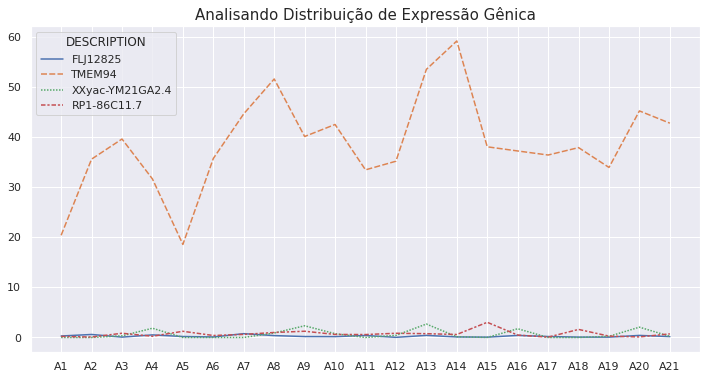

In [ ]:
import random
sns.set('notebook')
ax = sns.lineplot(data=arquivo.iloc[:,[random.randint(0,56201) for i in range(0,4)]])
random.seed(1)
ax.figure.set_size_inches(12,6)
ax.set_xticklabels(['A{}'.format(i) for i in range(1, len(arquivo.index[0])+1)])
ax.set_title('Analisando Distribuição de Expressão Gênica', fontsize=15)

Conduto existe um problema nessa tabela. Existem colunas com mesmo nome, porém, não se sabe ao certo se essas variaveis se tratem de isomeros ou apenas erros da tabela. As duas situações podem ser implementadas, porém, creio que se tratarmos essas colunas como isomeros, essa analise pode ser mais completa. Por isso, vamos achar quais são as colunas com mesmo nome e adiocionar nelas um diferencial para que não sejam confundidas na hora filtragem. 

In [ ]:
tamanho_total = len(arquivo.columns)
tamanho_unicos = len(set(arquivo.columns))
tamanho_total - tamanho_unicos

1608

Como foi notado podemos ver que trata de um número expressivo de colunas que se repetem. Vamos descobrir quais são? 

In [ ]:
repetidos = arquivo.columns.value_counts().to_frame()
selecao = repetidos > 1
repetidos = repetidos[selecao]
repetidos.dropna(inplace=True)
colunas_repetidas = list(repetidos.index)
repetidos

,DESCRIPTION
Y_RNA,738.0
Metazoa_SRP,167.0
U3,50.0
U6,33.0
snoU13,32.0
...,...
LINC01422,2.0
SNORD30,2.0
RGS5,2.0
SNORD22,2.0


Descoberta quais são as linhas que estão repetidas, consegui transformar todos os nomes de variaveis com nomes unicos. Pude ter certeza por causa da função bulit-in do python set(), que usa como parametro um iteravel e retorna apenas os valores sem repetições.

In [ ]:
lista_descricao_original = list(arquivo.columns)
for index in colunas_repetidas:
  contador = 0
  while lista_descricao_original.count(index) > 1:
    indice = lista_descricao_original.index(index)
    lista_descricao_original.pop(indice)
    lista_descricao_original.insert(indice,'{}.{}'.format(index, contador))
    contador+=1
len(set(lista_descricao_original))

56200

Substituindo nomes das colunas para iniciar a analise descritiva

In [ ]:
arquivo.columns = lista_descricao_original

In [ ]:
arquivo.columns.unique()

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'FAM138A', 'OR4G4P',
       'OR4G11P', 'OR4F5', 'RP11-34P13.7', 'CICP27',
       ...
       'MT-ND4', 'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE',
       'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype='object', length=56200)

# Escolhendo parametros para filtragem

Já que observamos que as variáveis podem ter correlações, aqui vamos elencar valores de dispersão e de posição com o fim de filtrar quais as variaveis que possuem valores mais relevantes. 

In [ ]:
lista_parametros = arquivo.agg(['min', 'mean', 'max', 'median', 'sum', 'mad', 'var', 'std'])

In [ ]:
lista_parametros = lista_parametros.T
lista_parametros

,min,mean,max,median,sum,mad,var,std
DDX11L1,0.000000,0.006324,0.029400,0.000,0.132800,0.009034,1.127829e-04,0.010620
WASH7P,1.026000,5.168096,12.580000,5.164,108.530006,1.922862,6.680110e+00,2.584591
MIR6859-1,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000e+00,0.000000
MIR1302-2HG,0.000000,0.012976,0.078400,0.000,0.272500,0.018537,5.120239e-04,0.022628
FAM138A,0.000000,0.007457,0.048900,0.000,0.156600,0.012073,2.658246e-04,0.016304
...,...,...,...,...,...,...,...,...
MT-ND6,563.299988,8896.776367,20220.000000,8275.000,186832.296875,4661.048828,3.194344e+07,5651.853027
MT-TE,0.000000,30.207569,80.440002,27.510,634.358948,19.194462,5.121690e+02,22.631151
MT-CYB,3037.000000,22971.761719,33180.000000,23660.000,482407.000000,4110.367676,3.769436e+07,6139.573730
MT-TT,0.000000,0.378548,1.237000,0.000,7.949500,0.432626,2.350821e-01,0.484853


Normalizando os registros das variaveis, pois existem muitos valores são muito dispersos.

In [ ]:
from sklearn import preprocessing
x = arquivo.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
arquivo = pd.DataFrame(x_scaled)

In [ ]:
arquivo.columns = lista_descricao_original

Os valores estatísticos que foram escolhido para filtração dos dados foram a mediana e o desvio padrão. O motivo foi que a média não ia refletir a realidade das distribuição dos registros, pois muitos deles são bastante dispersos. E o desvio padrão foi escolhido para que as distruibuições mais homogeneas sejam elencadas.


In [ ]:
lista_parametros = arquivo.agg(['median','std'])
lista_parametros

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
median,0.000000,0.358144,0.0,0.000000,0.000000,0.219542,0.00000,0.190850,0.110522,0.112352,...,0.459186,0.294350,0.000000,0.168815,0.390826,0.392319,0.341994,0.684172,0.000000,0.289268
std,0.361222,0.223697,0.0,0.288622,0.333418,0.257756,0.31262,0.242995,0.287762,0.248211,...,0.185259,0.256133,0.215736,0.249401,0.257379,0.287528,0.281342,0.203682,0.391959,0.286700


Valores escolhidos para mediana e desvio padrão
 - Mediana ->  Maior que o terceiro quartil da distribuição de medianas
 - Desvio padrão -> Menor que o primeiro quartil da distruibuição de desvios.

In [ ]:
lista_parametros.iloc[0].describe()

count    56200.000000
mean         0.147606
std          0.182678
min          0.000000
25%          0.000000
50%          0.037080
75%          0.275840
max          0.871483
Name: median, dtype: float64

In [ ]:
lista_parametros.iloc[1].describe()

count    56200.000000
mean         0.211177
std          0.112907
min          0.000000
25%          0.218218
50%          0.248506
75%          0.283738
max          0.422673
Name: std, dtype: float64

Escolhendo colunas que passam no parametro de filtragem escolhido

In [ ]:
escolha_colunas = []
for coluna in lista_parametros:
  median = lista_parametros.loc['median', coluna]
  desvio_padrao = lista_parametros.loc['std', coluna]
  if median > 0.275840 and desvio_padrao < 0.20:
    escolha_colunas.append(coluna)
len(escolha_colunas)

In [ ]:
dados_filtrados = arquivo[escolha_colunas]

Correlacionado dados filtrados

In [ ]:
dados_correlacionados = dados_filtrados.corr()

Tratando dados correlacionados

In [ ]:
data_unstack = dados_correlacionados.unstack()
selecao = data_unstack.values > 0.70
data_unstack = data_unstack[selecao]
data_stack = data_unstack.unstack(level=-1)
data_stack

,RPL22,ZMYM1,GPBP1L1,NIT1,NVL,GALNT2,ITGB1BP1,ZNF512,GEMIN6,COX7A2L,...,CTC-559E9.8,ZNF571,ZNF607,MAP3K10,RNF114,ELK1,SNX12,MT-ND1,MT-ATP6,MT-ND4
RPL22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMYM1,NaN,1.000000,0.861503,NaN,0.823987,NaN,NaN,NaN,NaN,NaN,...,NaN,0.824266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPBP1L1,NaN,0.861503,1.000000,NaN,0.792580,NaN,NaN,NaN,NaN,NaN,...,NaN,0.724919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIT1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NVL,NaN,0.823987,0.792580,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ELK1,NaN,NaN,NaN,NaN,NaN,0.8766,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
SNX12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
MT-ND1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.702353,NaN
MT-ATP6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.702353,1.000000,0.959251


# Plotando gráfico

Text(0.5, 1.0, 'Correlação gene_tpm_2017-06-05_v8_bladder Gene by Gene')

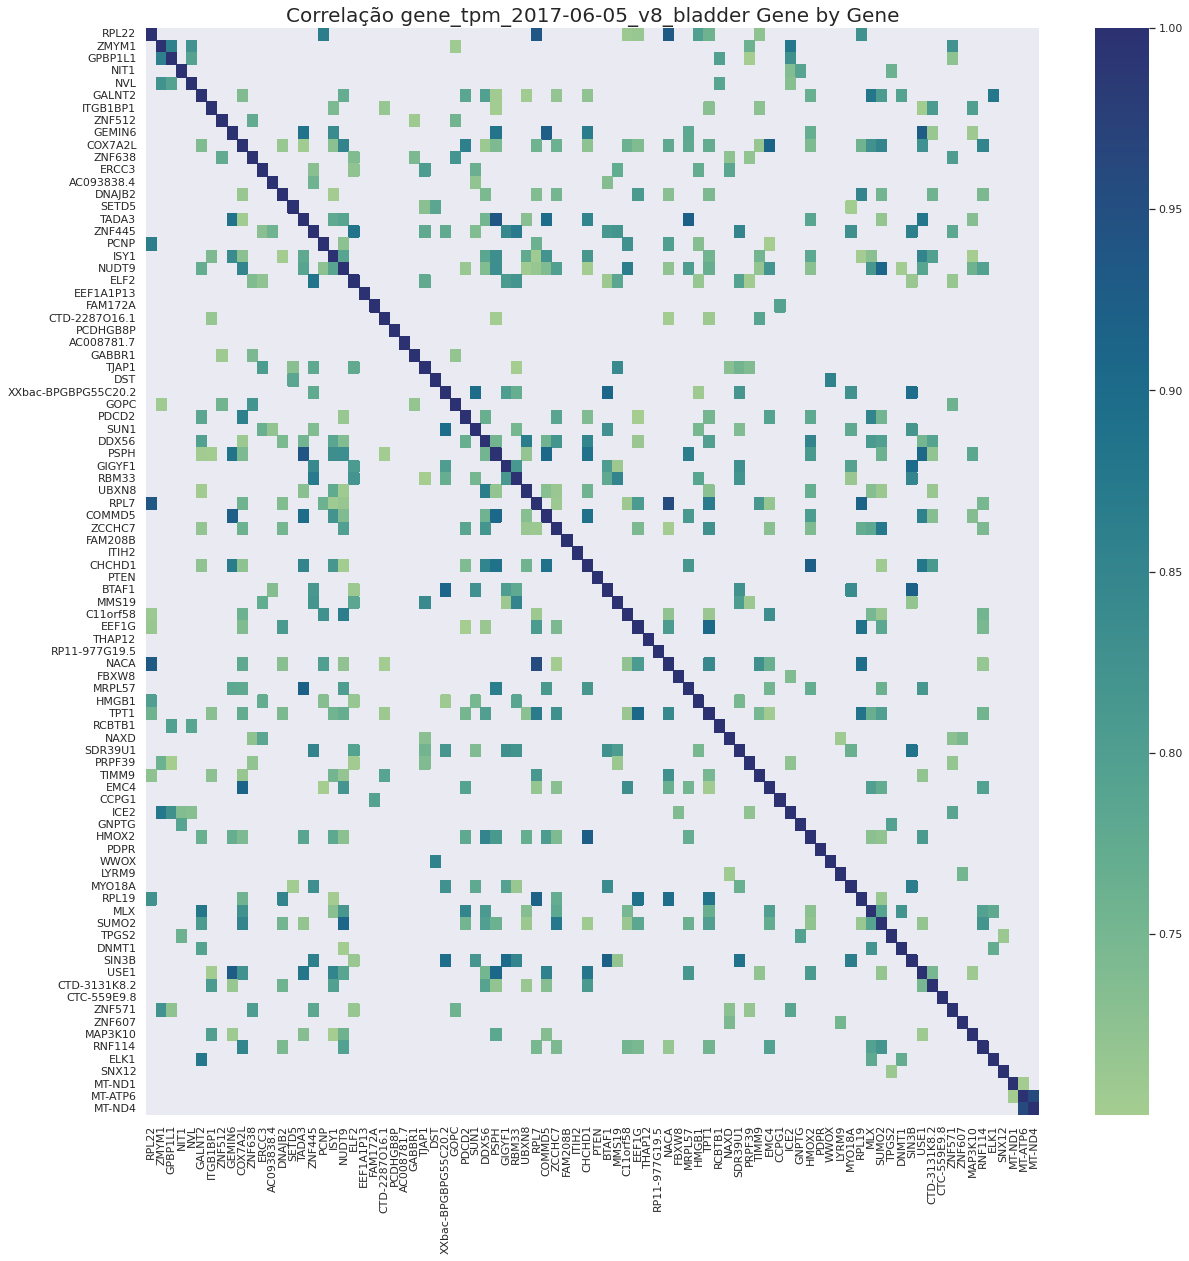

In [62]:
ax = sns.heatmap(data=data_stack,
                 xticklabels=data_stack.index, 
                 yticklabels=data_stack.index, 
                 cmap='crest')
ax.figure.set_size_inches(20,20)
ax.set_title(f'Correlação {nome} Gene by Gene', fontsize=20)